In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

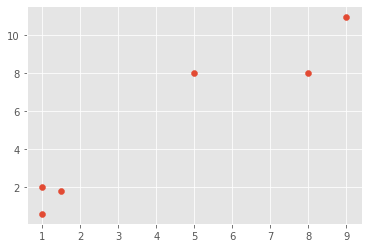

In [19]:
X = np.array([
    [1, 2],
    [1.5, 1.8],
    [5, 8],
    [8, 8],
    [1, 0.6],
    [9, 11]
])

colors = ['r', 'b', 'g', 'y', 'c']

plt.scatter(X[:,0], X[:,1])
plt.show()

In [26]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        
    def fit(self, data):
        self.centroids = {}
        
        # first 2 observations will be our centroids
        for i in range(self.k):
            self.centroids[i] = data[i]
           
        for i in range(self.max_iter):
            self.classifications = {}
            for j in range(self.k):
                self.classifications[j] = []
                
            for featureset in data:
                distances = [np.linalg.norm(featureset - self.centroids[centroid])
                            for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
                
            prev_centroids = dict(self.centroids)
            
            for classification in self.classifications:
                pass
                self.centroids[classification] = np.average(self.classifications[classification],
                                                            axis=0)
            optimized = True
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid - original_centroid) / original_centroid*100) > self.tol:
                    optimized = False
        
            if optimized:
                break
            
            
    
    def predict(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid])
                            for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

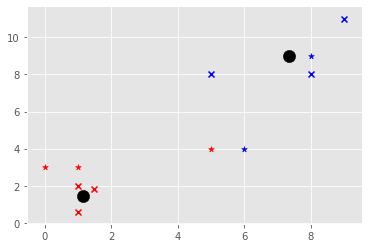

In [29]:
classifier = K_Means()
classifier.fit(X)

for centroid in classifier.centroids:
    plt.scatter(classifier.centroids[centroid][0], 
                classifier.centroids[centroid][1], 
                marker='o', color='k', s=150)
    
for classification in classifier.classifications:
    color = colors[classification]
    for featureset in classifier.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker='x', color=color)
        
unknowns = np.array([
    [1, 3],
    [8, 9],
    [0, 3],
    [5, 4],
    [6, 4]
])

for unknown in unknowns:
    classification = classifier.predict(unknown)
    plt.scatter(unknown[0], unknown[1], marker='*', color=colors[classification])
    
plt.show()